# **Parameter Estimation**

In [80]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (11, 5)  #set default figure size
import numpy as np
from numpy import exp
from scipy.special import factorial
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import statsmodels.api as sm
from statsmodels.api import Poisson
from scipy import stats
from scipy.stats import norm
from statsmodels.iolib.summary2 import summary_col
import math

# **PART - A**

In the first part we use maximum likelihood to estimate parameters for the distributions of two classes of Data. In the first class are the values of indicator x, that show tha someone did not feel stress while playing a specific video game. In the second class there are values that shoe someone did not feel stress. After estmation of parameters a discriminant function is used to categorize data.

In [81]:
class Classifier:

  def fit(self,D,thetaRange,classNumber):
    #calculate
    log_likelihood1 = lambda theta : sum(math.log((1/math.pi)*(1/(1 +(x-theta)**2))) for x in D)
    estimates = [log_likelihood1(theta) for theta in thetaRange]
    theta = thetaRange[estimates.index(max(estimates))]
    #plot
    plt.plot(thetaRange, estimates,label = f'$log(p(D_{classNumber}|\u03B8))$')
    plt.axvline(x = theta, color = 'black', label = 'maximum likelihood \u03B8 value')
    plt.grid()
    plt.title(f'class {classNumber}', fontsize=30)
    plt.xlabel(f'theta{classNumber}')
    plt.ylabel('likehood')
    plt.legend()
    plt.show()
    print(f"Theta {classNumber} is",theta)
    return theta

  def predict(self,theta1,theta2,D1,D2,Pomega1,Pomega2):
    P1 = lambda x :  math.log((1/math.pi)*(1/(1 +(x-theta1)**2)))
    P2 = lambda x :  math.log((1/math.pi)*(1/(1 +(x-theta2)**2)))
    log_P1 = math.log(Pomega1)
    log_P2 = math.log(Pomega2)
    x_rage = np.arange(-10, 10, 0.01)

    myP1 = lambda x :  ((1/math.pi)*(1/(1 +(x-theta1)**2)))
    myP2 = lambda x :  ((1/math.pi)*(1/(1 +(x-theta2)**2)))

    g = lambda x : P1(x) - P2(x) + log_P1 - log_P2 
    g_x = [g(theta) for theta in x_rage]


    gValues1 = [g(theta) for theta in D1]
    gValues2 = [g(theta) for theta in D2]
    gValues = gValues1 + gValues2

    plt.plot(x_rage, g_x ,label = "g(x)")
    plt.plot(D1,gValues1,'r',marker='o', ls='none', ms=4)
    plt.plot(D2,gValues2,'y',marker='o', ls='none', ms=4)
    #plt.axvline(x = thetas1[estimates1.index(max(estimates1))], color = 'black', label = 'maximum likelihood \u03B8 value')
    #plt.axvline(x = thetas2[estimates2.index(max(estimates2))], color = 'black', label = 'maximum likelihood \u03B8 value')
    plt.grid()
    plt.title('Depiction of g(x)', fontsize=30)
    plt.xlabel('x values')
    plt.ylabel('g(x)')
    plt.legend()
    plt.show()
    return gValues


## 1. maximum likelihood method

The given function $p(x|θ) = \frac{1}{π} \frac{1}{1 + (x - θ)^2}$ returns the probability of an indicator x belonging in the first or second class given that the parameter θ is known. Since we do not actually know the value of, we use the maximum likelihood estimation method to estimate it. We have 7 values of x that belong in the first class and 5 that belong in the second. Claiming that the probability of a person feeling anxious or not by playing the video game is independant by the probability of the feelings of another person, we have statistical independancy. We are going to estimate θ seperately for each class. The joint PDF for each class is given by $$p(X|θ) = \prod_{k=1}^{N} p(x_k,θ) $$

This is the likelihood function, it is a function where θ is the independent variable. According to maximum likelihood estimation method, $\theta$ should take the value that maximizes this function. We can also take maximum of the log of this function, to take advantage of logarithmic properties for products. Instead of taking the log of the above product, we can calculate the sum of each log. Also, because log function is a strictly increasing funcion, nothing changes in finding the maximum by taking the log.

Below we can see the graphs of the functions $p(D_1|θ), p(D_2|θ)$. By finding the θ value that maximazes the function for each class, we estimate $θ_{1}$ and $θ_2$ with maximum likelihood estimation method.


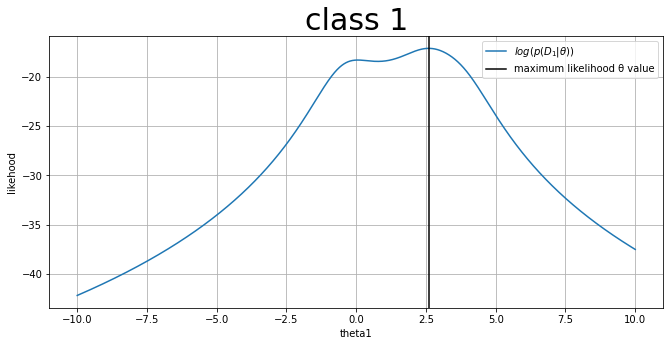

Theta 1 is 2.599999999993017


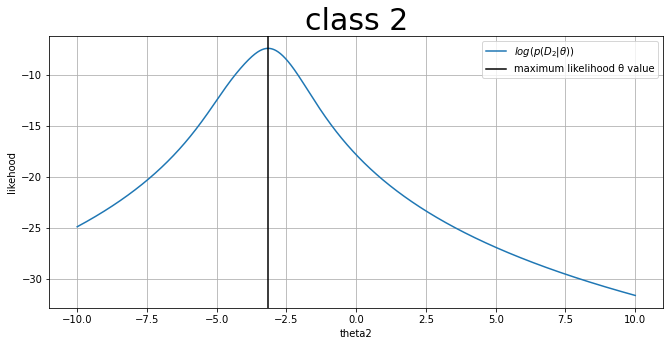

Theta 2 is -3.1590000000037914


In [82]:
D1 = [2.8, -0.4, -0.8, 2.3, -0.3, 3.6, 4.1]
D2 = [-4.5, -3.4, -3.1, -3, -2.3]
thetas = np.arange(-10, 10, 0.001)
myClassifier = Classifier()
theta1 = myClassifier.fit(D1,thetas,1)
theta2 = myClassifier.fit(D2,thetas,2)


##2.Discriminant function

In this query we use the function: $g(x) = log(P|̂\hat{θ_1}) - log(P|̂\hat{θ_2}) + logP(ω_1) - logP(ω_2)$ as a discriminant function to classify data.

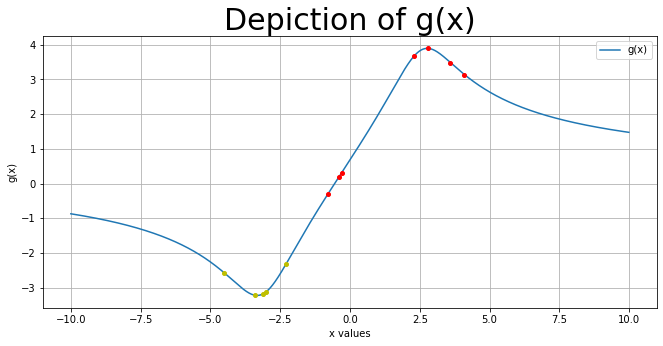

In [83]:
Pomega1 = 7/12
Pomega2 = 5/12
D = [2.8, -0.4, -0.8, 2.3, -0.3, 3.6, 4.1,-4.5, -3.4, -3.1, -3, -2.3]
b = myClassifier.predict(theta1,theta2,D1,D2,Pomega1,Pomega2)


# **PART B**

1. Let's calculate and show the aposteriori probabilities $p(\theta|D_1)$ and $p(\theta|D_2)$. By using the Bayes Rule we obtain $$P(\theta|D_i) = \frac{P(D_i|\theta)p(\theta)}{P(D_i)} = \frac{P(D_i|\theta)p(\theta)}{∫P(D_i|\theta)p(\theta)d\theta}$$


In [84]:
likelihood1 = lambda theta : np.prod([(1/math.pi)*(1/(1 +(x-theta)**2)) for x in D1])
likelihood2 = lambda theta : np.prod([(1/math.pi)*(1/(1 +(x-theta)**2)) for x in D2])

likelihood_theta = lambda theta : (1 / (10 * np.pi)) * 1 / (1 + pow(theta / 10, 2))

estimates = np.array([likelihood_theta(theta) for theta in thetas])

estimates_d1 = np.array([np.prod(likelihood1(theta)) for theta in thetas])
estimates_d2 = np.array([np.prod(likelihood2(theta)) for theta in thetas])
print(estimates)
print(estimates_d1)
print(estimates_d2)
aposteriori_1 = (np.multiply(estimates, estimates_d1)) / np.trapz(np.multiply(estimates, estimates_d1), x = thetas)
aposteriori_2 = (np.multiply(estimates, estimates_d2)) / np.trapz(np.multiply(estimates, estimates_d2), x = thetas)



[0.01591549 0.01591709 0.01591868 ... 0.01592027 0.01591868 0.01591709]
[4.67885036e-19 4.68460542e-19 4.69036807e-19 ... 5.05578625e-17
 5.04704937e-17 5.03832870e-17]
[1.60145420e-11 1.60380632e-11 1.60616223e-11 ... 1.92143611e-14
 1.91999153e-14 1.91854814e-14]


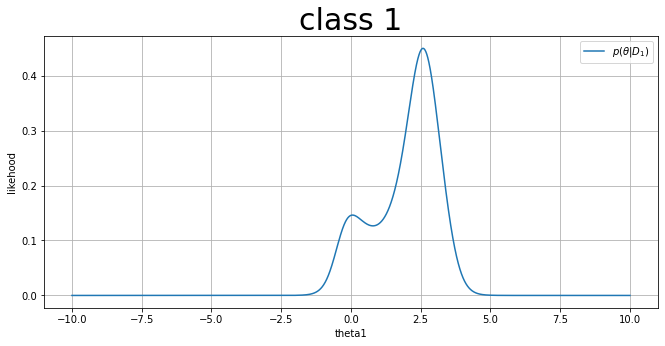

In [88]:
plt.plot(thetas,aposteriori_1  ,label = f'$p(\u03B8|D_{1})$')
# plt.axvline(x = theta, color = 'black', label = 'maximum likelihood \u03B8 value')
plt.grid()
plt.title(f'class {1}', fontsize=30)
plt.xlabel(f'theta{1}')
plt.ylabel('likehood')
plt.legend()
plt.show()

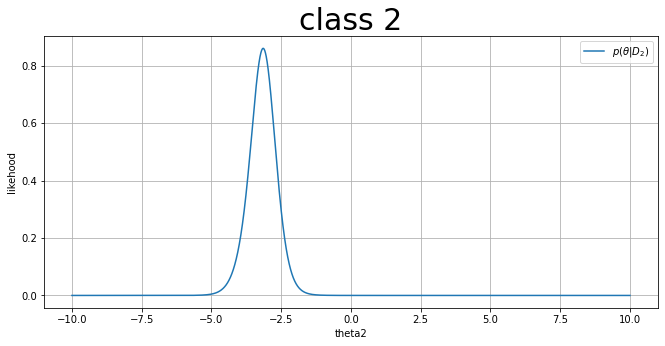

In [89]:
plt.plot(thetas,aposteriori_2  ,label = f'$p(\u03B8|D_{2})$')
# plt.axvline(x = theta, color = 'black', label = 'maximum likelihood \u03B8 value')
plt.grid()
plt.title(f'class {2}', fontsize=30)
plt.xlabel(f'theta{2}')
plt.ylabel('likehood')
plt.legend()
plt.show()

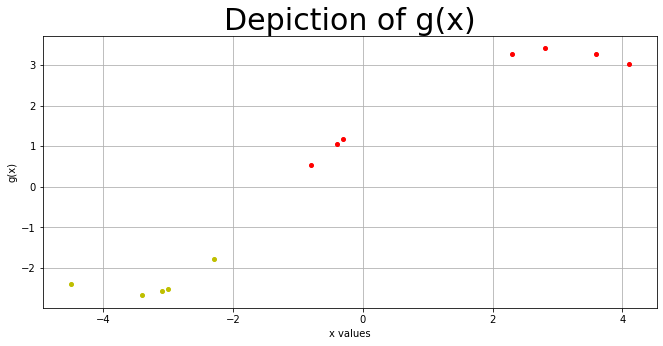

In [120]:

Px_theta = lambda x, theta: (1 / np.pi) * 1 / (1 + pow(x - theta, 2))

distribution = np.array([Px_theta(x, thetas) for x in np.hstack((D1, D2))])
distribution.shape

P_xD1 = np.trapz(np.multiply(distribution, aposteriori_1), x = thetas)
P_xD2 = np.trapz(np.multiply(distribution, aposteriori_2), x = thetas)
class_1 = []
class_2 = []
for i in range(P_xD1.shape[0]):
  g_x = np.log(P_xD1[i]) - np.log(P_xD2[i]) + np.log(Pomega1) - np.log(Pomega2)
  if g_x > 0:
    class_1.append(g_x)
  else:
    class_2.append(g_x)

plt.plot(D1,class_1,'r',marker='o', ls='none', ms=4)
plt.plot(D2,class_2,'y',marker='o', ls='none', ms=4)
#plt.axvline(x = thetas1[estimates1.index(max(estimates1))], color = 'black', label = 'maximum likelihood \u03B8 value')
#plt.axvline(x = thetas2[estimates2.index(max(estimates2))], color = 'black', label = 'maximum likelihood \u03B8 value')
plt.grid()
plt.title('Depiction of g(x)', fontsize=30)
plt.xlabel('x values')
plt.ylabel('g(x)')
# plt.legend()
plt.show()

In [118]:
class_1


[3.41018226012037,
 1.0650497035036253,
 0.5269999005657016,
 3.274477074650373,
 1.1855149608668167,
 3.2682062271782124,
 3.022048447966745]